### Meng Wang

# MTH9875 Homework 5

Assigned: September 22, 2016.
Due: October 6, 2016 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## An empirical SPX volatility surface

Friday, September 16, 2011 was triple witching day for SPX options and futures.  Thus, the volatility surface as of the close on the 15th, that includes September options expiring the following morning, should have a shape just as interesting as the one shown in Figure 3.2 of The Volatility Surface.  Indeed more interesting, because the term structure of volatility was downwards sloping.

### 1. (3 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
Derive the put-call parity formula for European options in the form

$$
C-P=PV\,(F-K)
$$ 

where $C$ is the call price, $P$ is the put price, $F$ is the forward price, $K$ is the strike and $PV$ is the discount factor.

### Answer
$$
C=PV\,\E\left[(S_T-K)^+|S_t\right]
$$
$$
P=PV\,\E\left[(K-S_T)^+|S_t\right]
$$
$$
C-P=PV\,\E\left[(S_T-K)^+-(K-S_T)^+|S_t\right]=PV\,\E\left[S_T-K|S_t\right]=PV\left(\E\left[S_T|S_t\right]-K\right)=PV\left(F-K\right)
$$

### Download some code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/BlackScholes.R.zip", destfile="BlackScholes.R.zip")
unzip(zipfile="BlackScholes.R.zip")
source("BlackScholes.R")
source("Heston2.R")

### 2.  (8 points) 

Given $n$ option strikes from a given expiration $T$, write R-code to take the $2\,n$ option prices and return $F$ and $PV$ for that expiration (obviously you need at least two strikes).  Test your code on the following prices for European options expiring in 36 days:

| Strike | Call price | Put price |
|--------|---------:|----------:|
| 1190 | 52.23 | 37.51 | 
| 1195 | 49.11 | 39.34 | 
| 1200 | 46.59 | 41.52 | 
| 1205 | 43.13 | 42.55 | 
| 1210 | 40.21 | 45.40 | 
| 1215 | 37.45 | 47.57 | 
  



With the resulting values of $F$ and $PV$, and using the implied volatility calculator in *BlackScholes.R*, compute implied volatilities for the above options.  Display these by adding a column to the above table.

### Answer

In [2]:
### setup
res<-data.frame(matrix(ncol = 4, nrow = 6))
colnames(res)<-c("Strike","Call price","Put price","Implied volatility")
res[,"Strike"]<-c(1190,1195,1200,1205,1210,1215)
res[,"Call price"]<-c(52.23,49.11,46.59,43.13,40.21,37.45)
res[,"Put price"]<-c(37.51,39.34,41.52,42.55,45.40,47.57)

### linear regression to get F and PV
lr<-lm((res[,"Call price"]-res[,"Put price"])~res[,"Strike"])
PV<--summary(lr)$coeff[2]
F<-summary(lr)$coeff[1]/PV
cat("F: ",F," PV: ",PV,"\n")

### implied volatility
S0<-F*PV
Texp<-36/365
r<--log(PV)/Texp

for (i in 1:dim(res)[1]){
    res[i,"Implied volatility"]<-BSImpliedVolCall(S0, res[i,"Strike"], Texp, r, res[i,"Call price"])
}
res

F:  1204.992  PV:  0.9918286 


Strike,Call price,Put price,Implied volatility
1190,52.23,37.51,0.2984816
1195,49.11,39.34,0.2950218
1200,46.59,41.52,0.2950292
1205,43.13,42.55,0.2881578
1210,40.21,45.40,0.2843159
1215,37.45,47.57,0.2809337


### Download code for problem 3.

The following code loads the file *spxData110915.rData* into your working directory and sources *plotIvols.R* which has implied volatility smile plotting functionality.

In [3]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")

download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/spxOptionMetrics.rData_.zip", destfile="spxOptionMetrics.rData.zip")
unzip(zipfile="spxOptionMetrics.rData.zip")

source("plotIvols.R")

*spxOptionMetrics.rData* contains in particular the data frame `spxData110915` which has all SPX options closing prices as of September 15, 2011.  Data is from OptionMetrics (http://www.optionmetrics.com/index.html) via WRDS (http://wrds-web.wharton.upenn.edu/wrds/).

Note that SPX strike prices are out by a factor of 1000.

In [4]:
load("spxOptionMetrics.rData")

# Inspect the raw data
head(spxData110915[,1:10])

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer
2559920,108105,20110915,SPX 110917C100000,1,20110917,20110815,C,100000,1106.4,1110.0
2559921,108105,20110915,SPX 110917C1000000,1,20110917,20110915,C,1000000,206.4,210.0
2559922,108105,20110915,SPX 110917C1005000,1,20110917,20110829,C,1005000,200.2,204.1
2559923,108105,20110915,SPX 110917C1010000,1,20110917,20110829,C,1010000,195.2,199.1
2559924,108105,20110915,SPX 110917C1015000,1,20110917,20110912,C,1015000,190.2,194.1
2559925,108105,20110915,SPX 110917C1020000,1,20110917,20110909,C,1020000,186.5,190.1


### 3.  (20 points) 

(a)
Write a function in R called *generateIvols* that inputs *spxData110915* and outputs bid and offer implied volatilities for all strikes and expirations in a data frame that has the same format as the dataframe `spxOptData` from Lecture 5.


(b)
Plot your results using *plotIvols()*; your picture should look something like Figure 6 in the lecture slides (without the orange SVI fit of course).


### Answer
(a)


In [5]:
### linear regression to get F and PV
get_fwd_pv<-function(strikes,callpx,putpx){
    lr<-lm((callpx-putpx)~strikes)
    PV<--summary(lr)$coeff[2]
    F<-summary(lr)$coeff[1]/PV
    return(cbind(F,PV))
}

### outputs bid and offer implied volatilities for call options
generateIvols<-function(df=spxData110915){
    res<-data.frame()
    
    exdates<-unique(df[,"exdate"])
    for (edate in exdates){
        data.subset<-subset(df,exdate==edate)
        
        strikes<-unique(data.subset[,"strike_price"])/1000
        calls<-subset(data.subset,cp_flag=="C")
        puts<-subset(data.subset,cp_flag=="P")
        callpx<-(calls[,"best_bid"]+calls[,"best_offer"])/2
        putpx<-(puts[,"best_bid"]+puts[,"best_offer"])/2
        fwd_pv<-get_fwd_pv(strikes,callpx,putpx)
        
        F<-fwd_pv[1]
        PV<-fwd_pv[2]
        S0<-F*PV
        Texp<-(as.numeric(strptime(edate, format="%Y%m%d")-strptime(df[1,"date"], format="%Y%m%d")))/365
        r<--log(PV)/Texp
        
        res.subset<-data.frame(matrix(ncol = 7, nrow = dim(calls)[1]))
        colnames(res.subset)<-c("Expiry","Texp","Strike","Bid","Ask","Fwd","CallMid")
        res.subset[,"Expiry"]<-calls[,"exdate"]
        res.subset[,"Strike"]<-calls[,"strike_price"]/1000
        res.subset[,"CallMid"]<-(calls[,"best_bid"]+calls[,"best_offer"])/2
        res.subset[,"Texp"]<-rep(Texp,dim(calls)[1])
        res.subset[,"Fwd"]<-rep(F,dim(calls)[1])
        
        for(i in 1:dim(calls)[1]){
            res.subset[i,"Bid"]<-BSImpliedVolCall(S0, res.subset[i,"Strike"], Texp, r, calls[i,"best_bid"])
            res.subset[i,"Ask"]<-BSImpliedVolCall(S0, res.subset[i,"Strike"], Texp, r, calls[i,"best_offer"])
            if(res.subset[i,"Bid"]<1e-9){
                res.subset[i,"Bid"]<-NA
                res.subset[i,"CallMid"]<-NA
            }
            if(res.subset[i,"Ask"]<1e-9){
                res.subset[i,"Ask"]<-NA
                res.subset[i,"CallMid"]<-NA
            }
        }
        res<-rbind(res,res.subset)
    }
    return(res)
}
ivolData <- generateIvols(spxData110915)
head(ivolData)

Expiry,Texp,Strike,Bid,Ask,Fwd,CallMid
20110917,0.005479452,100,NA,10.000000,1207.652,NA
20110917,0.005479452,1000,NA,1.511093,1207.652,NA
20110917,0.005479452,1005,NA,1.348994,1207.652,NA
20110917,0.005479452,1010,NA,1.318430,1207.652,NA
20110917,0.005479452,1015,NA,1.287927,1207.652,NA
20110917,0.005479452,1020,NA,1.392041,1207.652,NA


(b)

$expiries
 [1] 0.005479452 0.021917808 0.041095890 0.101369863 0.178082192 0.254794521
 [7] 0.290410959 0.504109589 0.539726027 0.753424658 0.789041096 1.271232877
[13] 1.769863014 2.268493151

$atmVol
 [1] 0.1779896 0.3032696 0.2952358 0.2824866 0.2879243 0.2849906 0.2854654
 [8] 0.2799291 0.2808495 0.2759346 0.2762182 0.2686951 0.2649695 0.2633125

$atmSkew
 [1] -1.2982434 -1.2612594 -1.0912791 -0.8863583 -0.6634992 -0.6118390
 [7] -0.5417905 -0.4531453 -0.4206936 -0.3399221 -0.3526073 -0.2875572
[13] -0.2527103 -0.2051292

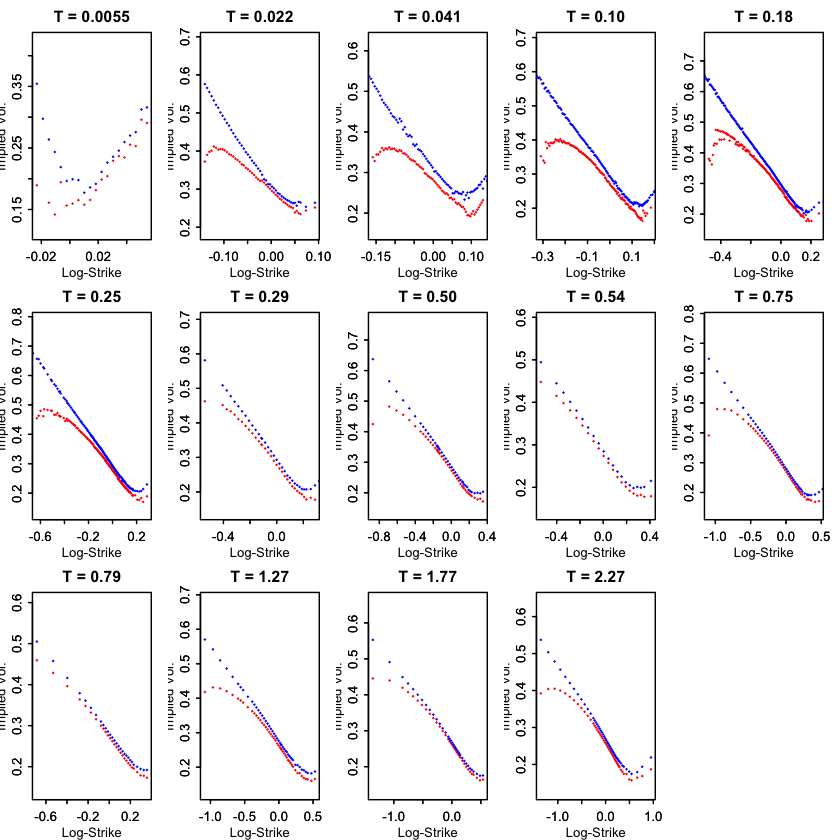

In [6]:
ivolData <- ivolData[order(ivolData[,"Texp"],ivolData[,"Strike"]),]
plotIvols(ivolData)

## Approximate calibration of the Heston parameters

### 4.  (26 points) 

(a)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (23) for ATM variance skew to the empirical ATM skew estimates in Table 2 of Lecture 5. 


(b)
Using your code from (a) and all the points, assuming $\rho=-0.7$, estimate the Heston parameters $\lambda$ and $\eta$. How similar are your estimates the Heston parameters $\lambda$ and $\eta$ to the estimates from September 2005 listed in Table 3 of Lecture 5?  Are Heston fitted parameters stable over time?


(c)
Repeat (a) and (b) dropping the first expiries, as in Lecture 5.


(d) Fit a power law of the form $A/T^\alpha$ to the ATM variance skew data (all points).


(e) 
Superimpose graphs of your resulting ATM skew fits from (b), (c), and (d) to generate a plot like Figure 8 of Lecture 5.

(f)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (20) 

$$
\left.{\sigma_{BS}(K,T)^2}\right|_{K=F_T} \approx \left( {{ v - \bar v'}}\right)\frac{1- e^{ -
\lambda' \,T}}{\lambda' \,T} + \bar v'.
$$

for ATM variance to the empirical ATM variance estimates in Table 2 of Lecture 5.

(g) Graph the empirical ATM variance vs time to expiration and your fit from (f) to generate a plot like Figure 9 of Lecture 5.

(h)
Amend the plotIvols() code (renaming it plotIvolsHeston(..)) to take data and Heston parameters as input and superimpose Heston smiles on the empirical smiles.  Using your fitted parameters from (c) and (f) to get a picture like Figure 4 or Figure 7 of Lecture 5 (except that Heston doesn't fit!). (You may have to vectorize the *impvolHeston* function to get this to work in the iPython notebook.)

(i) 
Note that the Heston smiles are consistently below the empirical smiles.  Why is that? How do Heston skews compare with empirical skews?

### Answer
(a)

In [7]:
skewHeston <- function(skewParams,texp){

    rhoeta <- skewParams[1]
    lam <- skewParams[2]
    lt <- lam*texp
    skew <- rhoeta/lt*(1-(1-exp(-lt))/lt)	
    return(skew)
    
    }

texp<-c(1/365,1/12,2/12,3/12,6/12,9/12,15/12,21/12,27/12)
atmSkews<-c(-0.7343,-0.5164,-0.4439,-0.3741,-0.2525,-0.2122,-0.1658,-0.1339,-0.1185)

skewObjective1 <- function(skewParams){
    
    skewModel <- skewHeston(skewParams,texp)
    skewEmpirical <- atmSkews
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    
    }

res1 <- optim(c(-.7*.39,1.15),skewObjective1)
(fit1 <- res1$par)

[1] -1.388691  7.996911

(b)

In [8]:
rho<--0.7
eta1<-fit1[1]/rho
lmd1<-fit1[2]+fit1[1]/2
cat("lambda: ",lmd1," eta: ",eta1,"\n")

lambda:  7.302565  eta:  1.983844 


In [ ]:
In Table 3, $\lambda=1.3253$, $\eta=0.3877$, Heston fitted parameters change over time.

(c)

In [9]:
skewObjective2 <- function(skewParams){
    
    skewModel <- skewHeston(skewParams,texp[-1])
    skewEmpirical <- atmSkews[-1]
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    
    }

res2 <- optim(c(-.7*.39,1.15),skewObjective2)
(fit2 <- res2$par)

[1] -1.159672  5.326391

In [11]:
rho<--0.7
eta2<-fit2[1]/rho
lmd2<-fit2[2]+fit2[1]/2
cat("lambda: ",lmd2," eta: ",eta2,"\n")

lambda:  4.746554  eta:  1.656675 


(d)

In [12]:
skewObjectivePL <- function(PLParams){
    A<-PLParams[1]
    alpha<-PLParams[2]
    
    skewModel <- A/(texp^alpha)
    skewEmpirical <- atmSkews
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    
    }

resPL <- optim(c(-0.2,0.4),skewObjectivePL)
(fitPL <- resPL$par)

[1] -0.2378829  0.2021213

(e)

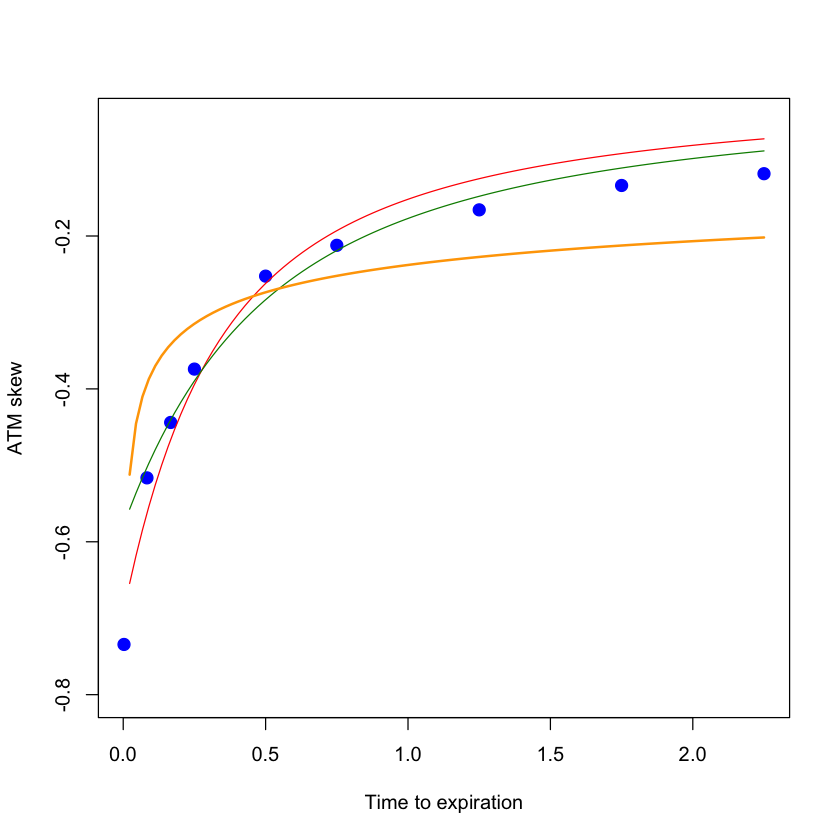

In [13]:
plot(texp,atmSkews,col="blue",ylim=c(-.8,-.05),pch=20,cex=2,xlab="Time to expiration",ylab="ATM skew")
curve(skewHeston(fit1,x),from=0,to=27/12,col="red",add=T)
curve(skewHeston(fit2,x),from=0,to=27/12,col="green4",add=T)
curve(fitPL[1]/(x^fitPL[2]),from=0,to=27/12,col="orange",lwd=2, add=T)

SPX ATM skew vs time to expiry. Blue points are empirical skews; the red line is a fit of (23) to all empirical skews; the dark green fit excludes the first data point; the orange line is a power-law fit.

(f)

fit empirical variance after dropping the first expiry.

In [14]:
varHeston <- function(varParams,texp){
    
    v <- varParams[1]
    vbar <- varParams[2]
    lam <- varParams[3]
    lt <- lam*texp
    var <- vbar + (v-vbar)*(1-exp(-lt))/lt
    return(var)
    
    }

atmVars<-c(0.0494,0.0831,0.0841,0.0825,0.0786,0.0761,0.0728,0.0699,0.0692)

varObjective <- function(varParams){
    
    varModel <- varHeston(varParams,texp[-1])
    varEmpirical <- atmVars[-1]
    obj <-sum((varModel-varEmpirical)^2)
    return(obj*1000000)
    
    }

(res <- optim(c(0.04,0.04,1.15),varObjective))
fit <- res$par

$par
[1] 0.08538816 0.05965940 1.20859926

$value
[1] 3.852882

$counts
function gradient 
      80       NA 

$convergence
[1] 0

$message
NULL


(g)

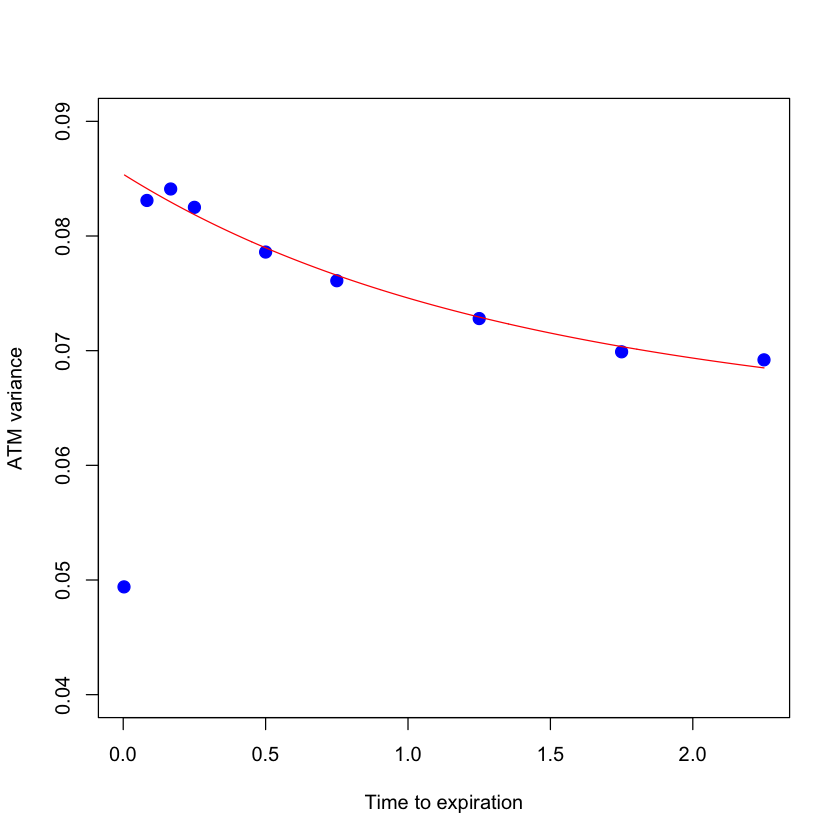

In [15]:
plot(texp,atmVars,col="blue",ylim=c(0.04,0.09),xlab="Time to expiration",pch=20,cex=2,ylab="ATM variance")
curve(varHeston(fit,x),from=0,to=27/12,col="red",n=500,add=T)

(h)

$expiries
 [1] 0.005479452 0.021917808 0.041095890 0.101369863 0.178082192 0.254794521
 [7] 0.290410959 0.504109589 0.539726027 0.753424658 0.789041096 1.271232877
[13] 1.769863014 2.268493151

$atmVol
 [1] 0.1779896 0.3032696 0.2952358 0.2824866 0.2879243 0.2849906 0.2854654
 [8] 0.2799291 0.2808495 0.2759346 0.2762182 0.2686951 0.2649695 0.2633125

$atmSkew
 [1] -1.2982434 -1.2612594 -1.0912791 -0.8863583 -0.6634992 -0.6118390
 [7] -0.5417905 -0.4531453 -0.4206936 -0.3399221 -0.3526073 -0.2875572
[13] -0.2527103 -0.2051292

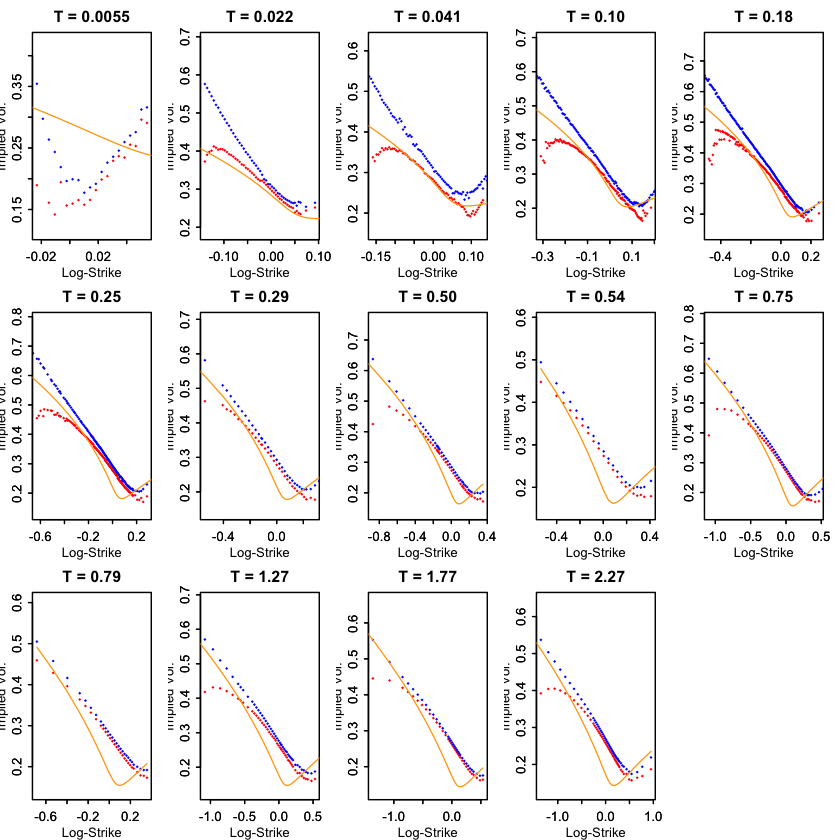

In [16]:
library(stinepack);

plotIvolsHeston <- function(ivolData,HestonParams,slices=NULL){
    
	bidVols <- as.numeric(ivolData$Bid);
	askVols <- as.numeric(ivolData$Ask);
	expDates <- unique(ivolData$Texp);
	nSlices <- length(expDates);
	if(!is.null(slices)) {nSlices <- length(slices)} else {slices <- 1:nSlices};
	colnum <- sqrt(nSlices*2);
	rows <- round(colnum/2,0);
	columns <- round(colnum,0);
	while(rows*columns < nSlices) {rows <- rows+1;}

	atmVol <- numeric(nSlices);
	atmSkew <-numeric(nSlices);

	###############################################################################################################
	#Plot all the slices
	par(mfrow=c(rows,columns),mex=0.5)
	for (slice in slices){
			t <- expDates[slice];
			texp <- ivolData$Texp;
			bidVol <- bidVols[texp==t];
			askVol <- askVols[texp==t];
			midVol <- (bidVol+askVol)/2;
			f <- (ivolData$Fwd[texp==t])[1];
			k <- log(ivolData$Strike[texp==t]/f); # Plot vs log-strike
			include <- !is.na(bidVol);
			kmin <- min(k[include]);
			kmax <- max(k[include]);
			ybottom <- 0.8*min(bidVol[include]);
			ytop <- 1.2*max(askVol[include],na.rm=T);
			xrange <- c(kmin,kmax);
			yrange <- c(ybottom,ytop);
            
            ### vectorize impvolHestion
            ivolHeston<-function(k){sapply(k,function(x){impvolHeston(HestonParams)(x,t)})}
        
			plot(k,bidVol,col="red",pch=18,cex=.5, xlim=xrange,ylim=yrange,main=paste("T =",format(t,digits=2,nsmall=2)),xlab="Log-Strike",ylab="Implied Vol.");
            par(new=T);
            plot(k,askVol,col="blue",pch=18,cex=.5,xlim=xrange,ylim=yrange,main=NA,xlab=NA,ylab=NA);
            lines(k,ivolHeston(k),col="orange",pch=18,cex=.5,xlim=xrange,ylim=yrange,main=NA,xlab=NA,ylab=NA)

			# Compute and store empirical levels and skews
			kIn <- k[!is.na(midVol)];
		    volIn <- midVol[!is.na(midVol)];
			volInterp <- function(xout){stinterp(x=kIn,y=volIn, xout)$y};
			atmVol[slice] <- volInterp(0);
			atmSkew[slice] <- (volInterp(0.01)-volInterp(-0.01))/0.02;
		}
	par(mfrow=c(1,1),mex=1)
	par(new=F)
	return(list(expiries=expDates,atmVol=atmVol,atmSkew=atmSkew));
}

### using Heston parameters fitted without 1st expiry
v<-fit[1]
lmd<-fit[3]+fit2[1]/2
vbar<-fit[2]*fit[3]/lmd

HestonParams<-list(lambda=lmd,rho = -0.7,eta = eta2,vbar = vbar,v = v)
plotIvolsHeston(ivolData,HestonParams)

In [ ]:
(i)
<br/> The Heston smiles are consistently below the empirical smiles is caused by the approximation error of MLP and the imperfectness of Heston model.
<br/> Heston skews are similar to empirical skews.